In [1]:
# mencari directory saat ini
import os
os.getcwd()

'C:\\Users\\KOMPUTER\\Documents\\Jupyter Notebooks'

In [2]:
# Merubah directory
os.chdir('D:\\ITS\\Tugas Akhir\\Source Code')
# Merubah directory (beneran)
os.chdir('D:/ITS/Tugas Akhir/Source Code')

In [3]:
import numpy as np
import pandas as pd
import glob 

In [4]:
cur_path = "D:/ITS/Tugas Akhir/Source Code/Dataset/"

In [5]:
normal_file_names = glob.glob(cur_path+'/normal/*.csv')
imnormal_horizontal_misalignment = glob.glob(cur_path+'/horizontal-misalignment/*.csv')
imnormal_imbalance = glob.glob(cur_path+'/imbalance/*.csv')
imnormal_overhang = glob.glob(cur_path+'/overhang/*.csv')
imnormal_underhang = glob.glob(cur_path+'/underhang/*.csv')
imnormal_vertical_misalignment = glob.glob(cur_path+'/vertical-misalignment/*.csv')

In [6]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [7]:
data_normal = dataReader(normal_file_names)
data_horizontal_misalignment = dataReader(imnormal_horizontal_misalignment)
data_imbalance = dataReader(imnormal_imbalance)
data_overhang = dataReader(imnormal_overhang)
data_underhang = dataReader(imnormal_underhang)
data_vertical_misalignment = dataReader(imnormal_vertical_misalignment)

In [8]:
# DOWN SAMPLING

def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [9]:
data_normal = downSampler(data_normal, 0, 50000)
data_horizontal_misalignment = downSampler(data_horizontal_misalignment, 0, 50000)
data_imbalance = downSampler(data_imbalance, 0, 50000)
data_overhang = downSampler(data_overhang, 0, 50000)
data_underhang = downSampler(data_underhang, 0, 50000)
data_vertical_misalignment = downSampler(data_vertical_misalignment, 0, 50000)

In [10]:
data_horizontal_misalignment

,0,1,2,3,4,5,6,7
0,0.004055,0.013189,0.003894,0.002324,-0.027389,0.000653,-0.035551,0.017286
1,-0.001035,0.015996,0.003567,0.002255,-0.051833,0.002957,-0.054043,0.017472
2,0.003208,0.006928,0.002353,0.002057,0.107578,0.000156,0.097477,0.018963
3,0.000746,0.025214,0.004951,0.002435,-0.032969,-0.009393,0.010228,0.016646
4,0.007249,-0.008664,-0.002407,0.001566,0.207741,0.026050,-0.005252,0.017316
...,...,...,...,...,...,...,...,...
245,0.000035,0.012087,0.000264,0.000707,0.247556,0.003112,0.094474,0.012970
246,-0.002064,0.010227,0.000312,0.000724,-0.052881,0.002874,-0.018619,0.013194
247,0.005816,0.012548,0.001805,0.000811,-0.414524,-0.000297,-0.207669,0.013307
248,-0.007534,0.013080,-0.000948,0.000608,0.152569,0.003673,0.026869,0.013501


In [11]:
# FFT

from scipy import signal
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [12]:
data_normal = FFT(data_normal)
data_horizontal_misalignment = FFT(data_horizontal_misalignment)
data_imbalance = FFT(data_imbalance)
data_overhang = FFT(data_overhang)
data_underhang = FFT(data_underhang)
data_vertical_misalignment = FFT(data_vertical_misalignment)

In [32]:
y_1 = pd.DataFrame(np.ones(int(len(data_normal)),dtype=int))
y_2 = pd.DataFrame(np.zeros(int(len(data_horizontal_misalignment)),dtype=int))
y_3 = pd.DataFrame(np.full((int(len(data_imbalance)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_overhang)),1),3))
y_5 = pd.DataFrame(np.full((int(len(data_underhang)),1),4))
y_6 = pd.DataFrame(np.full((int(len(data_vertical_misalignment)),1),5))
y = pd.concat([y_1,y_2,y_3,y_4,y_5,y_6], ignore_index=True)
y

,0,1,2,3,4
0,1,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2969,5,5.0,5.0,5.0,5.0
2970,5,5.0,5.0,5.0,5.0
2971,5,5.0,5.0,5.0,5.0
2972,5,5.0,5.0,5.0,5.0


In [14]:
data = pd.concat([data_normal,data_horizontal_misalignment,data_imbalance,data_overhang,data_underhang,data_vertical_misalignment],ignore_index=True)

In [15]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000080,0.000106,-2.688144e-05,0.000021,0.000134,0.000819,0.000202,0.000826,-0.001978,-0.000023,-0.001018,0.001986,-0.000063,0.000820,0.000082
1,-0.000107,0.000123,-3.686867e-05,0.000023,-0.000561,0.000378,0.002974,-0.000111,0.000856,0.000452,0.019707,0.001989,0.007907,0.001928,0.000165
2,0.000061,0.000078,-1.467340e-05,-0.000007,0.000596,0.000288,-0.004749,0.001813,0.003281,0.000596,-0.027309,0.000332,-0.006265,-0.000406,0.000262
3,-0.000090,0.000045,-1.779285e-05,0.000007,0.000066,0.000143,0.007113,-0.002307,-0.000353,0.000026,0.033991,0.001472,-0.000681,0.001328,0.000360
4,0.000042,-0.000227,7.739995e-07,0.000007,0.001112,-0.000999,0.011436,-0.002479,0.003176,0.000922,0.084062,0.004015,0.051950,0.004514,0.000450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,-0.000108,0.000053,9.626415e-04,0.000029,-0.001788,0.002696,-0.002182,0.006529,0.007583,0.001758,0.081514,0.004542,0.141690,0.002082,0.001239
2970,0.000017,-0.000315,8.031496e-04,-0.000043,-0.001177,0.004802,-0.003333,0.014344,0.006961,0.001941,-0.002822,0.007220,-0.017867,0.007218,0.000986
2971,0.000063,-0.000477,9.242943e-04,0.000024,-0.000738,0.001682,-0.002479,0.008890,0.000257,0.000214,-0.009351,0.002320,-0.029464,0.007439,0.000723
2972,0.000043,-0.000330,5.822241e-04,0.000018,0.000579,-0.001997,0.000769,-0.002675,-0.000462,-0.000507,-0.016280,-0.002716,-0.024603,-0.003007,0.000491


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, shuffle=True)

In [17]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (2379, 15)
Shape of Test Data : (595, 15)


In [18]:
## SVM Machine Learning

from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)
print("SVM accuracy is {} on Train Dataset".format(svm.score(X_train,y_train)))
print("SVM accuracy is {} on Test Dataset".format(svm.score(X_test,y_test)))

C:\Users\KOMPUTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVM accuracy is 0.7620849096258933 on Train Dataset
SVM accuracy is 0.7394957983193278 on Test Dataset


In [19]:
## kNN Machine Learning

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
knn.fit(X_train,y_train)
print("k={}NN Accuracy on Train Data: {}".format(3,knn.score(X_train,y_train)))
print("k={}NN Accuracy on Test Data: {}".format(3,knn.score(X_test,y_test)))

k=3NN Accuracy on Train Data: 0.9609079445145019
k=3NN Accuracy on Test Data: 0.788235294117647


C:\Users\KOMPUTER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
## DNN Deep Learning

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(15,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(7, activation='softmax',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 231       
Total params: 21,511
Trainable params: 21,511
Non-trainable params: 0
____________________________________________________

In [21]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

C:\Users\KOMPUTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [22]:
hist = model.fit(X_train , y_train , epochs=50, validation_split=0.2)

Epoch 1/50
60/60 [==============================] - 1s 10ms/step - loss: 1.9142 - accuracy: 0.1724 - val_loss: 1.8258 - val_accuracy: 0.1471
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 1.7975 - accuracy: 0.1739 - val_loss: 1.8104 - val_accuracy: 0.1555
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 1.7938 - accuracy: 0.1666 - val_loss: 1.7910 - val_accuracy: 0.1471
Epoch 4/50
60/60 [==============================] - 0s 2ms/step - loss: 1.7719 - accuracy: 0.1671 - val_loss: 1.7479 - val_accuracy: 0.1471
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 1.7129 - accuracy: 0.1823 - val_loss: 1.6752 - val_accuracy: 0.1828
Epoch 6/50
60/60 [==============================] - 0s 2ms/step - loss: 1.6240 - accuracy: 0.3064 - val_loss: 1.6162 - val_accuracy: 0.4055
Epoch 7/50
60/60 [==============================] - 0s 2ms/step - loss: 1.5608 - accuracy: 0.3710 - val_loss: 1.5324 - val_accuracy: 0.3761
Epoch 8/50
60/60 [=

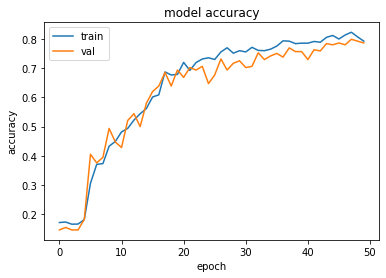

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

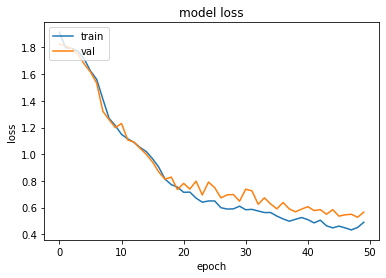

In [24]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.8049600720405579
Testing Accuracy:  0.7697479128837585


In [30]:
preds = model.predict(X_test) # label scores 

classpreds = np.argmax(preds, axis=1) # predicted classes 

y_testclass = np.argmax(y_test, axis=1) # true classes

n_classes=6 # number of classes

[[ 94  89  94 103 104 111]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


<ipython-input-31-502124e4d9bb>:11: RuntimeWarning: invalid value encountered in true_divide
  cm_perc = cm / cm_sum.astype(float) * 100


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

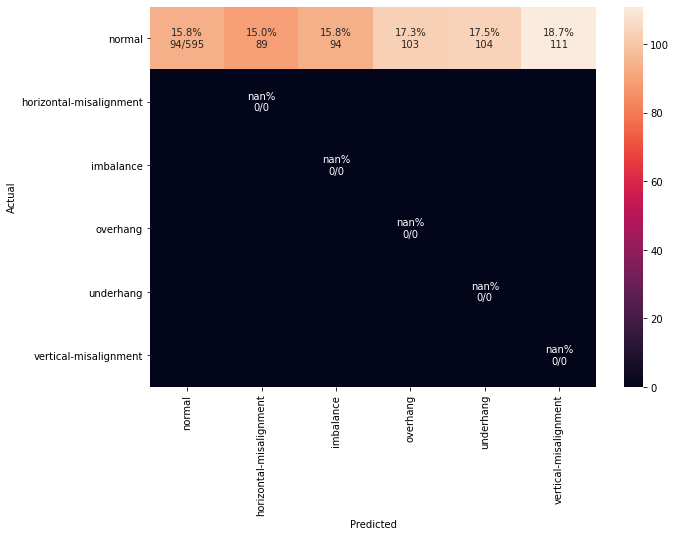

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
c_names = ['normal', 'horizontal-misalignment', 'imbalance', 'overhang', 'underhang', 'vertical-misalignment']
cm = confusion_matrix(y_testclass, classpreds)
print(cm)

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = c_names, columns = c_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')